In [58]:
import io
from pathlib import Path
from collections import defaultdict
from itertools import combinations

import graphviz as gv
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib_fontja

ABS = Path('.').resolve()
ABS


PosixPath('/home/misaizu/projects/media/100_nocks/5')

## 40

In [34]:
class Morph:
  def __init__(self, surface: str, base: str, pos: str, pos1: str):
    self.surface = surface
    self.base = base
    self.pos = pos
    self.pos1 = pos1

  def __dict__(self):
    d = {
      'surface': self.surface,
      'base': self.base,
      'pos': self.pos,
      'pos1': self.pos1,
    }
    return d

  def __repr__(self):
    return self.__dict__().__str__()


dependencies = []
with open(ABS / 'ai.ja.txt.parsed') as f:
  morphs = []
  for line in f.readlines():
    line = line.rstrip()
    if line.startswith('*'):
      continue

    if line == 'EOS':
      if morphs:
        dependencies.append(morphs)
        morphs = []
      continue

    surface, morph = line.split('\t')
    morph = morph.split(',')
    morph = Morph(surface, morph[6], morph[0], morph[1])
    morphs.append(morph)

print(dependencies[1])


[{'surface': '人工', 'base': '人工', 'pos': '名詞', 'pos1': '一般'}, {'surface': '知能', 'base': '知能', 'pos': '名詞', 'pos1': '一般'}, {'surface': '（', 'base': '（', 'pos': '記号', 'pos1': '括弧開'}, {'surface': 'じん', 'base': 'じん', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'こうち', 'base': 'こうち', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'のう', 'base': 'のう', 'pos': '助詞', 'pos1': '終助詞'}, {'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}, {'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}, {'surface': 'AI', 'base': '*', 'pos': '名詞', 'pos1': '一般'}, {'surface': '〈', 'base': '〈', 'pos': '記号', 'pos1': '括弧開'}, {'surface': 'エーアイ', 'base': '*', 'pos': '名詞', 'pos1': '固有名詞'}, {'surface': '〉', 'base': '〉', 'pos': '記号', 'pos1': '括弧閉'}, {'surface': '）', 'base': '）', 'pos': '記号', 'pos1': '括弧閉'}, {'surface': 'と', 'base': 'と', 'pos': '助詞', 'pos1': '格助詞'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}, {'surface': '「', 'base': '「', 'pos': '記号', 'po

## 41

In [35]:
class Chunk:
  def __init__(self, morphs: list[Morph]|None = None, dst=-1, srcs: list[int]|None = None):
    if morphs is None:
      morphs = []
    if srcs is None:
      srcs = []
    self.morphs = morphs
    self.dst = dst
    self.srcs = srcs

  def __len__(self):
    return len(self.morphs)

  def __dict__(self):
    d = {
      'morphs': self.morphs,
      'dst': self.dst,
      'srcs': self.srcs,
    }
    return d

  def __repr__(self):
    return self.__dict__().__str__()


sentences = []
i = 0
with open(ABS / 'ai.ja.txt.parsed') as f:
  chunk = Chunk()
  sentence = []
  G = defaultdict(list)
  for line in f.readlines():
    line = line.rstrip()
    if line.startswith('*'):
      if chunk:
        sentence.append(chunk)
        chunk = Chunk()
      _, idx, dst, *_ = line.split()
      idx = int(idx)
      dst = int(dst[:-1])
      chunk.dst = dst
      if dst != -1:
        G[dst].append(idx)
      continue

    if line == 'EOS':
      if chunk:
        sentence.append(chunk)
        chunk = Chunk()
      if sentence:
        for dst, vs in G.items():
          sentence[dst].srcs = vs
        sentences.append(sentence)
        sentence = []
      G.clear()
      continue

    surface, morph = line.split('\t')
    morph = morph.split(',')
    morph = Morph(surface, morph[6], morph[0], morph[1])
    chunk.morphs.append(morph)

print(sentences[1])


[{'morphs': [{'surface': '人工', 'base': '人工', 'pos': '名詞', 'pos1': '一般'}, {'surface': '知能', 'base': '知能', 'pos': '名詞', 'pos1': '一般'}], 'dst': 17, 'srcs': []}, {'morphs': [{'surface': '（', 'base': '（', 'pos': '記号', 'pos1': '括弧開'}, {'surface': 'じん', 'base': 'じん', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'こうち', 'base': 'こうち', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'のう', 'base': 'のう', 'pos': '助詞', 'pos1': '終助詞'}, {'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}, {'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}], 'dst': 17, 'srcs': []}, {'morphs': [{'surface': 'AI', 'base': '*', 'pos': '名詞', 'pos1': '一般'}], 'dst': 3, 'srcs': []}, {'morphs': [{'surface': '〈', 'base': '〈', 'pos': '記号', 'pos1': '括弧開'}, {'surface': 'エーアイ', 'base': '*', 'pos': '名詞', 'pos1': '固有名詞'}, {'surface': '〉', 'base': '〉', 'pos': '記号', 'pos1': '括弧閉'}, {'surface': '）', 'base': '）', 'pos': '記号', 'pos1': '括弧閉'}, {'surface': 'と', 'base': 'と', 'pos': '助詞', 'pos1': '格助詞'}, {'surface': 'は', 'base': 'は', 'pos': '助詞'

## 42

In [36]:
ans = []

for sentence in sentences:
  for chunk in sentence:
    if chunk.dst == -1:
      continue

    text1 = []
    for morph in chunk.morphs:
      if morph.pos == '記号':
        continue
      text1.append(morph.surface)

    text1 = ''.join(text1)

    text2 = []
    for morph in sentence[chunk.dst].morphs:
      if morph.pos == '記号':
        continue
      text2.append(morph.surface)

    text2 = ''.join(text2)
    ans.append(''.join([text1, '\t', text2]))

print(ans)


['人工知能\t語', 'じんこうちのう\t語', 'AI\tエーアイとは', 'エーアイとは\t語', '計算\tという', 'という\t道具を', '概念と\t道具を', 'コンピュータ\tという', 'という\t道具を', '道具を\t用いて', '用いて\t研究する', '知能を\t研究する', '研究する\t計算機科学', '計算機科学\tの', 'の\t一分野を', '一分野を\t指す', '指す\t語', '語\t研究分野とも', '言語の\t推論', '理解や\t推論', '推論\t問題解決などの', '問題解決などの\t知的行動を', '知的行動を\t代わって', '人間に\t代わって', '代わって\t行わせる', 'コンピューターに\t行わせる', '行わせる\t技術または', '技術または\t研究分野とも', '計算機\tコンピュータによる', 'コンピュータによる\t情報処理システムの', '知的な\t情報処理システムの', '情報処理システムの\t実現に関する', '設計や\t実現に関する', '実現に関する\t研究分野とも', '研究分野とも\tされる', '日本大百科全書(ニッポニカ)』の\t解説で', '解説で\t述べている', '情報工学者通信工学者の\t佐藤理史は', '佐藤理史は\t述べている', '次のように\t述べている', '人間の\t知的能力を', '知的能力を\t実現する', 'コンピュータ上で\t実現する', '実現する\t技術ソフトウェアコンピュータシステム', '様々な\t技術ソフトウェアコンピュータシステム', '技術ソフトウェアコンピュータシステム\tある', '応用例は\tある', '自然言語処理\t機械翻訳かな漢字変換構文解析等', '機械翻訳かな漢字変換構文解析等\t専門家の', '専門家の\t推論判断を', '推論判断を\t模倣する', '模倣する\tエキスパートシステム', 'エキスパートシステム\t画像認識等が', '画像データを\t解析して', '解析して\t検出抽出したりする', '特定の\tパターンを', 'パターンを\t検出抽出したりする', '検出抽出したりする\t画像認識等が', '画像認識等が\tある', 'ある\t命名された', '1956年に\t命名された', 'ダートマス会議

## 43

In [37]:
ans = []

for sentence in sentences:
  for chunk in sentence:
    if chunk.dst == -1:
      continue

    text1 = []
    noun = False
    for morph in chunk.morphs:
      if morph.pos == '記号':
        continue
      if morph.pos == '名詞':
        noun = True
      text1.append(morph.surface)

    if not noun:
      continue

    text1 = ''.join(text1)

    text2 = []
    verb = False
    for morph in sentence[chunk.dst].morphs:
      if morph.pos == '記号':
        continue
      if morph.pos == '動詞':
        verb = True
      text2.append(morph.surface)

    if not verb:
      continue

    text2 = ''.join(text2)
    ans.append(''.join([text1, '\t', text2]))

print(ans)


['道具を\t用いて', '知能を\t研究する', '一分野を\t指す', '知的行動を\t代わって', '人間に\t代わって', 'コンピューターに\t行わせる', '研究分野とも\tされる', '解説で\t述べている', '佐藤理史は\t述べている', '次のように\t述べている', '知的能力を\t実現する', 'コンピュータ上で\t実現する', '技術ソフトウェアコンピュータシステム\tある', '応用例は\tある', '推論判断を\t模倣する', '画像データを\t解析して', '解析して\t検出抽出したりする', 'パターンを\t検出抽出したりする', '画像認識等が\tある', '1956年に\t命名された', 'ダートマス会議で\t命名された', 'ジョンマッカーシーにより\t命名された', '命名された\t使われている', '現在では\t使われている', '記号処理を\t用いた', '記述を\tする', '主体と\tする', '意味あいでも\t使われている', '思考ルーチンも\t呼ばれる', 'ことも\tある', 'カウンセラーを\t模倣した', 'プログラム\t出されるが', '人工無脳が\t出されるが', '引き合いに\t出されるが', '計算機に\tさせようという', '役割を\tさせようという', 'エキスパートシステムと\t呼ばれる', '実現は\t困難視されている', '人間が\t持つ', '暗黙に\t持つ', '記述が\tなり', '問題と\tなり', '利用が\t困難視されている', '困難視されている\tある', 'アプローチとしては\t知られているが', 'アプローチも\t知られているが', '差は\tある', '記号的明示性に\tある', 'その後\t集めた', 'サポートベクターマシンが\t集めた', '注目を\t集めた', '経験を\t行う', '元に\t行う', '学習を\t行う', '手法も\tある', '宇宙において\t実装するという', '言葉通り\t実装するという', '知性を\t表現し', '機械的に\t表現し', '表現し\t実装するという', '登場により\t行った', '流行を\t超えて', '社会に\t浸透して', '浸透して\t行った', '2017年にかけて\t導入した', 'ディープラーニングを

## 44

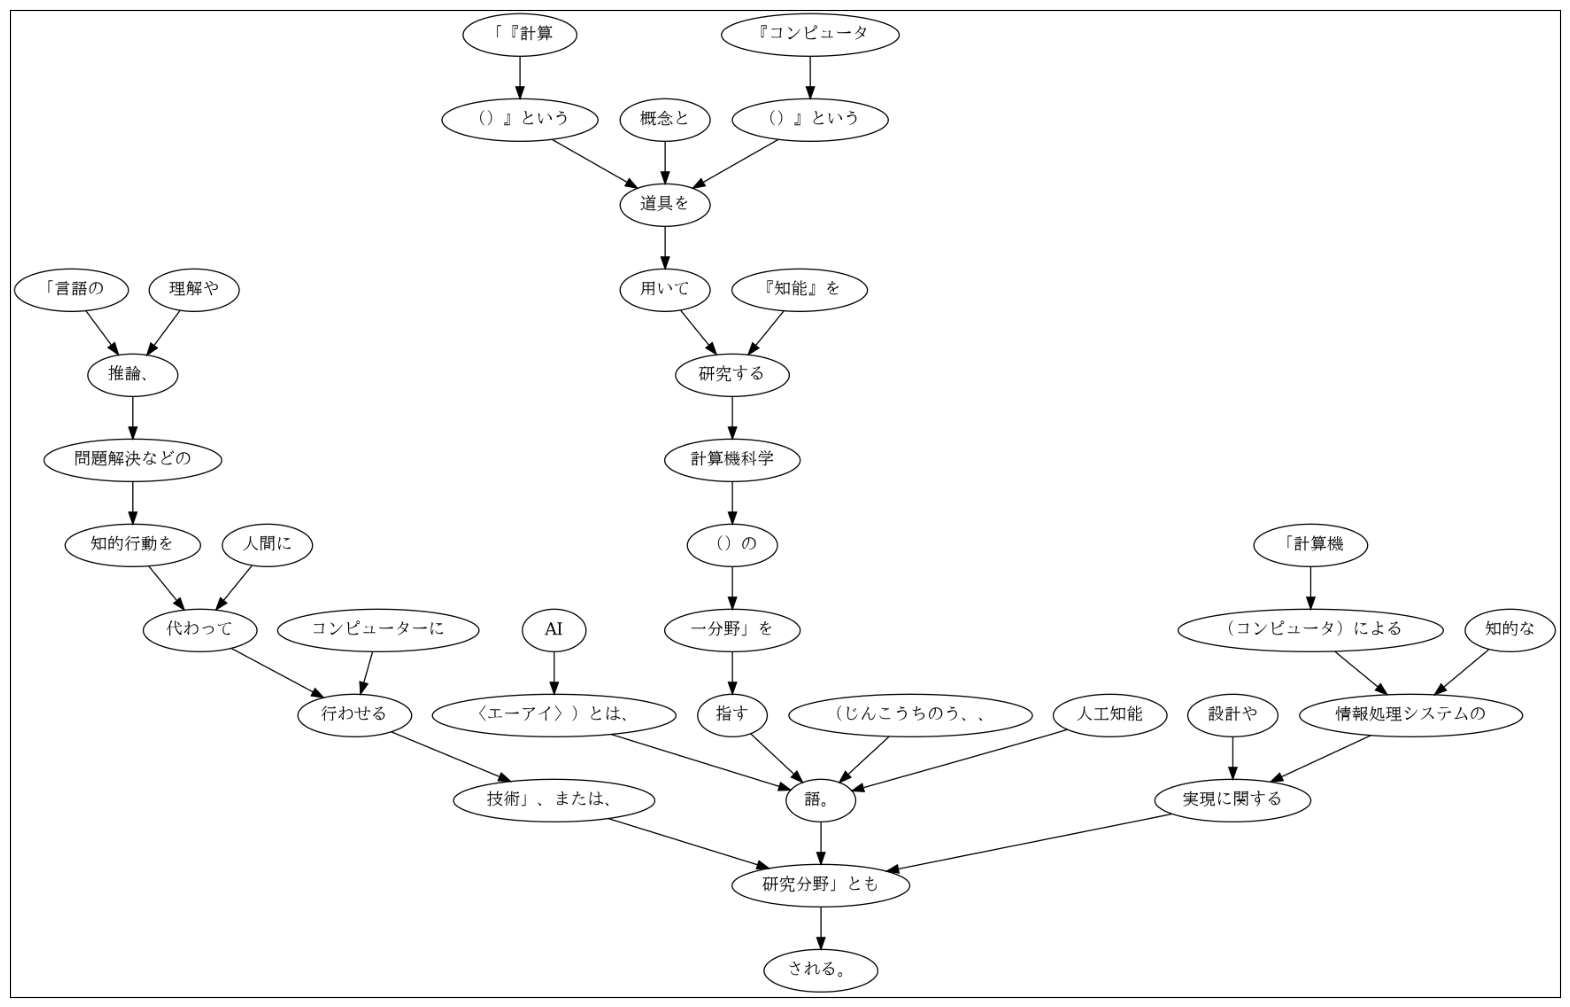

In [38]:
def visualize_tree(sentence: list[Chunk]):
  G = gv.Digraph()
  for i, chunk in enumerate(sentence):
    text = []
    for morph in chunk.morphs:
      text.append(morph.surface)
    text = ''.join(text)
    G.node(str(i), text)

  for i, chunk in enumerate(sentence):
    if chunk.dst == -1:
      continue
    G.edge(str(i), str(chunk.dst))

  G.attr('node', fontname='Noto Sans JP')
  G.attr('edge', fontname='Noto Sans JP')
  img = G.pipe(format='png')
  img = Image.open(io.BytesIO(img))
  plt.figure(figsize=(20, 20))
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img)
  plt.show()


visualize_tree(sentences[1])


## 45

In [39]:
patterns = []

for sentence in sentences:
  predicate = ''
  prepositionals = []
  idx = -1

  for i, chunk in enumerate(sentence):
    for morph in chunk.morphs:
      if morph.pos == '動詞':
        predicate = morph.base
        idx = i
        break

    if predicate:
      break

  if not predicate:
    continue

  for chunk in sentence:
    if chunk.dst != idx:
      continue

    for morph in chunk.morphs:
      if morph.pos == '助詞':
        prepositionals.append(morph.base)

  prepositionals.sort()
  pattern = ' '.join([predicate, *prepositionals])
  print(pattern)
  patterns.append(pattern)

with open('pattern.txt', 'w') as f:
  f.write('\n'.join(patterns))


用いる を
述べる で に の は
する で を
する を
超える を
呼ぶ と は
繰り返す を
する を
上回る で を
試みる
する が と
する を
なる に
行う に
示す で に は を
する に を
使う に によって は
する が に に は を
上げる が で は を
する が に は
する が に において は
入る に
費やす として を
用いる から として にかけて
する が に まで を
持つ から が が
する で に を
進む から として は
する が で を
する が に により
入る に
する が で に
する が
先立つ に により
向ける に
向ける に
する が
する が に
する
なる と
動かす で を
考える と
入る が で に
する に
含める まで
よる に
する が を
経る を
入る に
する と
位置づける から に を
向ける に
投じる が
する に は まで を
よる に
使う が は
する を
行う を
超える を
併せ持つ を
する に
達す で に は
試みる は を
する が
勝ち残る が に
する により は
ある に
する は
する で を
する に を
する と を
なる も
言う が
語る を
違う と は
創る は
述べる で と は は
語る を
論じる に
行う まで を


In [40]:
!cat pattern.txt | sort | uniq -c | sort
!cat pattern.txt | grep -e 行う -e なる -e 与える | cut -d " " -f 2- | sort | uniq -c | sort


      1 ある に
      1 する
      1 する が で に
      1 する が で を
      1 する が と
      1 する が に
      1 する が に に は を
      1 する が に において は
      1 する が に により
      1 する が に は
      1 する が に まで を
      1 する が を
      1 する で に を
      1 する と
      1 する と を
      1 する に は まで を
      1 する により は
      1 する は
      1 なる と
      1 なる に
      1 なる も
      1 上げる が で は を
      1 上回る で を
      1 位置づける から に を
      1 併せ持つ を
      1 使う が は
      1 使う に によって は
      1 先立つ に により
      1 入る が で に
      1 創る は
      1 動かす で を
      1 勝ち残る が に
      1 含める まで
      1 呼ぶ と は
      1 投じる が
      1 持つ から が が
      1 用いる から として にかけて
      1 用いる を
      1 示す で に は を
      1 経る を
      1 繰り返す を
      1 考える と
      1 行う に
      1 行う まで を
      1 行う を
      1 言う が
      1 試みる
      1 試みる は を
      1 論じる に
      1 費やす として を
      1 述べる で と は は
      1 述べる で に の は
      1 進む から として は
      1 達す で に は
      1 違う と は
      2 する で を
      2 する に
      2 する に を
      2 よる に
      2 語る を
      2 超える を
      3 する が
      3 入る に

## 46

In [41]:
patterns = []

for sentence in sentences:
  predicate = ''
  prepositionals = []
  idx = -1

  for i, chunk in enumerate(sentence):
    for morph in chunk.morphs:
      if morph.pos == '動詞':
        predicate = morph.base
        idx = i
        break

    if predicate:
      break

  if not predicate:
    continue

  for chunk in sentence:
    if chunk.dst != idx:
      continue

    prepositional = ''
    for morph in chunk.morphs:
      if morph.pos == '助詞':
        prepositional = morph.base
        break

    if not prepositional:
      continue

    text = []
    for morph in chunk.morphs:
      if morph.pos == '記号':
        continue
      text.append(morph.surface)

    prepositionals.append((prepositional, ''.join(text)))

  prepositionals.sort(key=lambda x: x[0])
  preps, texts = zip(*prepositionals) if prepositionals else ([], [])
  pattern = ' '.join([predicate, *preps, *texts])
  print(pattern)
  patterns.append(pattern)

with open('pattern2.txt', 'w') as f:
  f.write('\n'.join(patterns))


用いる を 道具を
述べる で の は 解説で 次のように 佐藤理史は
する で を コンピュータ上で 知的能力を
する を カウンセラーを
超える を 流行を
呼ぶ と は 機械学習と 人工知能は
繰り返す を 学習を
する を これらを
上回る で を 領域で 人工知能を
試みる
する が と 身体が 機械であると
する を 数学原理を
なる に 1950年代に
行う に 1956年に
示す で に は を プログラム中で 間に ジョエルモーゼスは パワーを
する に を 自律的に コースを
使う に によって は 1980年代に バックプロパゲーションアルゴリズムによって ニューラルネットワークは
する が に に を ロドニー・ブルックスが 時代に 知能には 身体性を
上げる が で は を アプリケーションが 分野で 1990年代は 成果を
する が に XMLが 1998年には
する が に において ニューロファジィが 後に 日本においては
入る に 1980年代に
費やす として を 国家プロジェクトとして 570億円を
用いる から として にかけて 従来から 手法として 中頃にかけて
する が まで を 日本が 2018年までに 特許を
持つ から が が 1985年頃から 松下電器が 人間が
する で に を 数式で 客観的に 対象を
進む から として は 能力限界から 遅々として 改善は
する が で を 人工知能が 点で 人間を
する が に により 深層化手法が 2006年に 研究チームにより
入る に 2010年代に
する が で に 用語が 英国エコノミスト誌で 2010年に
する が 研究チームが
先立つ に により 特異点に 齊藤元章により
向ける に 実現に
向ける に 実用化に
する が ロドニー・ブルックスが
する が に 米DeepMind社が 10月に
する
なる と 計算資源と
動かす で を 仮想空間で モデルを
考える と 不可能と
入る が で に 計算リソースが コストで 手に
する に 急速に
含める まで 位置関係まで
よる に 提言に
する が を OpenAIが 好奇心を
経る を 段階を
入る に 2019年に
する と アレン脳科学研究所と
位置づける から に を 第13次5カ年計画から 国家プ

## 47

In [42]:
for sentence in sentences:
  sahen = ''
  predicate = ''
  prepositionals = []
  idx = -1

  for i, chunk in enumerate(sentence):
    for morph in chunk.morphs:
      if morph.pos1 == 'サ変接続':
        sahen = morph.base
      if morph.pos == '動詞' and sahen:
        predicate = morph.base
        idx = i
        break

    if predicate:
      break

  if not(sahen and predicate):
    continue

  for chunk in sentence:
    if chunk.dst != idx:
      continue

    prepositional = ''
    for morph in chunk.morphs:
      if morph.pos == '助詞':
        prepositional = morph.base
        break

    if not prepositional:
      continue

    text = []
    for morph in chunk.morphs:
      if morph.pos == '記号':
        continue
      text.append(morph.surface)

    prepositionals.append((prepositional, ''.join(text)))

  prepositionals.sort(key=lambda x: x[0])
  preps, texts = zip(*prepositionals) if prepositionals else ([], [])
  pattern = ' '.join([f'{sahen}を{predicate}', *preps, *texts])
  print(pattern)


計算を用いる を 道具を
通信を述べる で の は 解説で 次のように 佐藤理史は
実現をする で を コンピュータ上で 知的能力を
模倣をする を カウンセラーを
流行を超える を 流行を
学習を呼ぶ と は 機械学習と 人工知能は
学習を繰り返す を 学習を
統合をする を これらを
認識を上回る で を 領域で 人工知能を
構築を試みる
提唱をする が と 身体が 機械であると
出版をする を 数学原理を
会議を作り出す で は を 会議で ジョンマッカーシーは 用語を
使用をする として において 用語として 提案書において
推論を示す で に は を プログラム中で 間に ジョエルモーゼスは パワーを
走行をする に を 自律的に コースを
提唱をする が に に を ロドニー・ブルックスが 時代に 知能には 身体性を
匹敵をする に 世界チャンピオンに
提唱をする が に XMLが 1998年には
流行をする が に において ニューロファジィが 後に 日本においては
提案をする が エキスパートシステムが
研究を進める て を 費やして 研究を
制御を用いる から として にかけて 従来から 手法として 中頃にかけて
取得をする が まで を 日本が 2018年までに 特許を
制御を活かす に を 制御に 曖昧さを
客観をする で に を 数式で 客観的に 対象を
改善を進む から として は 能力限界から 遅々として 改善は
超越をする が で を 人工知能が 点で 人間を
提案をする が に により 深層化手法が 2006年に 研究チームにより
整備をする が 環境が
提唱をする が で に 用語が 英国エコノミスト誌で 2010年に
開発をする が 研究チームが
生産を近づく が により 生産コストが 進歩により
実現を向ける に 実現に
実用を向ける に 実用化に
提唱をする が ロドニー・ブルックスが
作成をする が に 米DeepMind社が 10月に
入力をする
計算をなる と 計算資源と
仮想を動かす で を 仮想空間で モデルを
再現を考える と 不可能と
計算を入る が で に 計算リソースが コストで 手に
進化をする に 急速に
関係を含める まで 位置関係まで
提言をよる に 提言に
実装をする が を OpenAIが 好奇心

## 48

In [49]:
paths = []
for sentence in sentences:
  for chunk in sentence:
    noun = False
    for morph in chunk.morphs:
      if morph.pos == '名詞':
        noun = True
        break

    if not noun:
      continue

    path = []
    dest = chunk.dst
    pos = chunk

    while dest != -1:
      text = []
      for morph in pos.morphs:
        if morph.pos == '記号':
          continue
        text.append(morph.surface)
      path.append(''.join(text))
      pos = sentence[dest]
      dest = pos.dst

    if path:
      paths.append(path)

for path in paths:
  print(' -> '.join(path))


人工知能 -> 語 -> 研究分野とも
じんこうちのう -> 語 -> 研究分野とも
AI -> エーアイとは -> 語 -> 研究分野とも
エーアイとは -> 語 -> 研究分野とも
計算 -> という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも
概念と -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも
コンピュータ -> という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも
道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも
知能を -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも
研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも
計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも
一分野を -> 指す -> 語 -> 研究分野とも
語 -> 研究分野とも
言語の -> 推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも
理解や -> 推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも
推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも
問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも
知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも
人間に -> 代わって -> 行わせる -> 技術または -> 研究分野とも
コンピューターに -> 行わせる -> 技術または -> 研究分野とも
技術または -> 研究分野とも
計算機 -> コンピュータによる -> 情報処理システムの -> 実現に関する -> 研究分野とも
コンピュータによる -> 情報処理シス

## 49

In [67]:
for sentence in sentences:
  paths = defaultdict(list)
  for chunk in sentence:
    noun = []
    noun_chunk = []
    for morph in chunk.morphs:
      if morph.pos == '記号':
        continue
      if morph.pos == '名詞':
        noun.append(morph.base)

      noun_chunk.append(morph.surface)

    if not noun:
      continue

    noun_chunk = ''.join(noun_chunk)

    path = []
    dest = chunk.dst
    pos = chunk

    while dest != -1:
      text = []
      for morph in pos.morphs:
        if morph.pos == '記号':
          continue

        text.append(morph.surface)
      path.append(''.join(text))
      pos = sentence[dest]
      dest = pos.dst

    if path:
      paths[(noun_chunk, tuple(noun))] = path

  for i, j in combinations(paths.keys(), 2):
    c1, n1 = i
    c2, n2 = j
    ans = []
    if c1 in paths[j]:
      for chunk in paths[j]:
        ans.append(chunk)
        if chunk == c1:
          break
      ans = ' -> '.join(ans)
    elif c2 in paths[i]:
      for chunk in paths[i]:
        ans.append(chunk)
        if chunk == c2:
          break
      ans = ' -> '.join(ans)
    else:
      lca = ''
      for chunk in paths[i]:
        if chunk in paths[j]:
          lca = chunk
          break

      if not lca:
        continue

      ans1 = []
      for chunk in paths[i]:
        if chunk == lca:
          break
        ans1.append(chunk)

      ans2 = []
      for chunk in paths[j]:
        if chunk == lca:
          break
        ans2.append(chunk)

      ans = [' -> '.join(ans1), ' -> '.join(ans2), lca]
      ans = ' | '.join(ans)
    print(ans)


人工知能 | じんこうちのう | 語
人工知能 | AI -> エーアイとは | 語
人工知能 | エーアイとは | 語
人工知能 | 計算 -> という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す | 語
人工知能 | 概念と -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す | 語
人工知能 | コンピュータ -> という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す | 語
人工知能 | 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す | 語
人工知能 | 知能を -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す | 語
人工知能 | 研究する -> 計算機科学 -> の -> 一分野を -> 指す | 語
人工知能 | 計算機科学 -> の -> 一分野を -> 指す | 語
人工知能 | 一分野を -> 指す | 語
人工知能 -> 語
人工知能 -> 語 | 言語の -> 推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または | 研究分野とも
人工知能 -> 語 | 理解や -> 推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または | 研究分野とも
人工知能 -> 語 | 推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または | 研究分野とも
人工知能 -> 語 | 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または | 研究分野とも
人工知能 -> 語 | 知的行動を -> 代わって -> 行わせる -> 技術または | 研究分野とも
人工知能 -> 語 | 人間に -> 代わって -> 行わせる -> 技術または | 研究分野とも
人工知能 -> 語 | コンピューターに -> 行わせる -> 技術または | 研究分野とも
人工知能 -> 語 | 技術または | 研究分野とも
人工知能 -> 語 | 計算機 -> コンピュータによる -> 情報処理システムの -> 実現